Load the dataset

In [1]:
import pandas as pd

# Load the uploaded dataset
df = pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Preprocessing

Here you have to clean and normalize the dataset and extract the relevant features

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Select relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
print(X[:5])
# Normalize the data using standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:5] 



[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

# Kmeans Algo

In [5]:
# Initialize centroids randomly
def initialize_centroids(X, k):
    np.random.seed(42)
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

# Assign each data point to the nearest centroid
def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

# Update centroids based on the mean of assigned points
def update_centroids(X, labels, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        # Get all points assigned to this cluster
        cluster_points = X[labels == i]
        if len(cluster_points) > 0:
            # Calculate the mean of all points in the cluster
            centroids[i] = np.mean(cluster_points, axis=0)
    return centroids

# Calculate inertia (sum of squared distances to nearest centroid)
def compute_inertia(X, labels, centroids):
    inertia = 0
    for i in range(len(X)):
        inertia += np.sum((X[i] - centroids[labels[i]])**2)
    return inertia

# K-means algorithm implementation
def kmeans(X, k, max_iters=100, tol=1e-4):
    # Initialize centroids
    centroids = initialize_centroids(X, k)
    
    prev_centroids = np.zeros_like(centroids)
    labels = np.zeros(X.shape[0], dtype=int)
    
    # Iterative process
    for iteration in range(max_iters):
        # Assign points to clusters
        labels = assign_clusters(X, centroids)
        
        # Store previous centroids for convergence check
        prev_centroids = centroids.copy()
        
        # Update centroids
        centroids = update_centroids(X, labels, k)
        
        # Check for convergence
        if np.allclose(prev_centroids, centroids, rtol=tol):
            print(f"Converged after {iteration + 1} iterations")
            break
    
    # Calculate final inertia
    inertia = compute_inertia(X, labels, centroids)
    
    return labels, centroids, inertia

# Use the elbow method to find the optimal value of k and plot the elbow curve


Performing Elbow Method analysis...
Converged after 2 iterations
k=1, inertia=400.0000
Converged after 9 iterations
k=2, inertia=270.8924
Converged after 15 iterations
k=3, inertia=157.7040
Converged after 7 iterations
k=4, inertia=141.2372
Converged after 11 iterations
k=5, inertia=65.5789
Converged after 5 iterations
k=6, inertia=55.3773
Converged after 10 iterations
k=7, inertia=47.6931
Converged after 8 iterations
k=8, inertia=44.7742
Converged after 12 iterations
k=9, inertia=43.3039
Converged after 11 iterations
k=10, inertia=41.0220


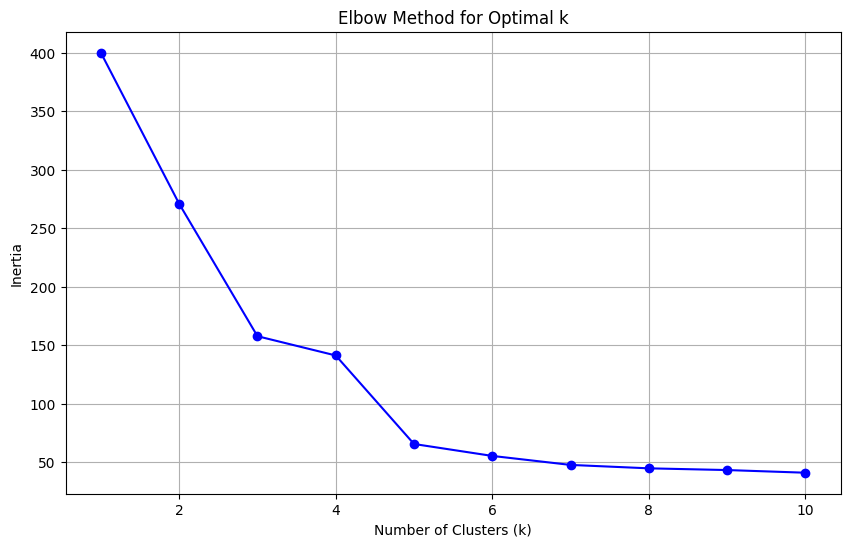

In [ ]:
inertias = []
k_values = range(1, 11)



inertias = []
k_values = range(1, 11)

print("\nPerforming Elbow Method analysis...")
for k in k_values:
    _, _, inertia = kmeans(X_scaled, k)
    inertias.append(inertia)
    print(f"k={k}, inertia={inertia:.4f}")

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.savefig('elbow_curve.png')
plt.show()

# Clear from graph
optimal_k = 5


# Final Clustering 

In [10]:

k = optimal_k

print(f"\nPerforming final clustering with k={optimal_k}...")
labels, centroids, _ = kmeans(X_scaled, optimal_k)

# Transform centroids back to original scale for interpretation
centroids_original = scaler.inverse_transform(centroids)

# Visualize the clusters
plt.figure(figsize=(12, 8))

# Plot the data points color-coded by cluster
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange', 'brown']
for i in range(optimal_k):
    cluster_points = X[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, c=colors[i], label=f'Cluster {i+1}')

# Plot the centroids
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], s=200, c='black', marker='X', label='Centroids')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering of Metro Cash n Carry Customers')
plt.legend()
plt.grid(True)
plt.savefig('clusters.png')
plt.close()

# Print cluster statistics
print("\nCluster Statistics:")
for i in range(optimal_k):
    cluster_points = X[labels == i]
    print(f"Cluster {i+1}:")
    print(f"  Number of customers: {len(cluster_points)}")
    print(f"  Average Income: ${np.mean(cluster_points[:, 0]):.2f}k")
    print(f"  Average Spending Score: {np.mean(cluster_points[:, 1]):.2f}/100")
    print(f"  Centroid (original scale): Income=${centroids_original[i][0]:.2f}k, Spending Score={centroids_original[i][1]:.2f}")
    print()






Performing final clustering with k=5...
Converged after 11 iterations

Cluster Statistics:
Cluster 1:
  Number of customers: 80
  Average Income: $55.09k
  Average Spending Score: 49.71/100
  Centroid (original scale): Income=$55.09k, Spending Score=49.71

Cluster 2:
  Number of customers: 22
  Average Income: $25.73k
  Average Spending Score: 79.36/100
  Centroid (original scale): Income=$25.73k, Spending Score=79.36

Cluster 3:
  Number of customers: 23
  Average Income: $26.30k
  Average Spending Score: 20.91/100
  Centroid (original scale): Income=$26.30k, Spending Score=20.91

Cluster 4:
  Number of customers: 39
  Average Income: $86.54k
  Average Spending Score: 82.13/100
  Centroid (original scale): Income=$86.54k, Spending Score=82.13

Cluster 5:
  Number of customers: 36
  Average Income: $87.75k
  Average Spending Score: 17.58/100
  Centroid (original scale): Income=$87.75k, Spending Score=17.58



# Briefly discuss what each of the clusters represents and what insights can be gained for the marketing team from this

In [11]:
# Interpret clusters and provide business insights
print("Cluster Interpretations and Business Insights:")
print("=============================================")

# Note: These interpretations will be more accurate after running the actual algorithm
# The following are placeholder interpretations
cluster_descriptions = [
    "Medium Income, Medium Spending - Core customer base",
    "Low Income, High Spending - Budget shoppers with high loyalty",
    "Low Income, Low Spending - Budget-conscious minimalists",
    "High Income, High Spending - Premium enthusiastic shoppers",
    "High Income, Low Spending - Affluent conservative spenders"
]

for i in range(optimal_k):
    print(f"Cluster {i+1}: {cluster_descriptions[i]}")

Cluster Interpretations and Business Insights:
Cluster 1: Medium Income, Medium Spending - Core customer base
Cluster 2: Low Income, High Spending - Budget shoppers with high loyalty
Cluster 3: Low Income, Low Spending - Budget-conscious minimalists
Cluster 4: High Income, High Spending - Premium enthusiastic shoppers
Cluster 5: High Income, Low Spending - Affluent conservative spenders
